In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame

In [5]:
names1880=pd.read_csv("../../Downloads/babynames/yob1880.txt", header=None, names=['name','gender','births'])
names1880

,name,gender,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [13]:
#성별 전체 출생
names1880.groupby('gender').births.sum()
names1880.pivot_table(index='gender',aggfunc=sum)

,births
gender,
F,90993
M,110493


In [14]:
years=range(1880,2011)
pieces=[]
for year in years:
    path=f"../../Downloads/babynames/yob{year}.txt"
    frame=pd.read_csv(path, header=None, names=['name','gender','births'])  
    frame['year']=year
    pieces.append(frame)

In [93]:
len(pieces)

131

In [117]:
names=pd.concat(pieces, ignore_index=True)
names

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


Text(0.5, 1.0, 'babies born in 1880-2010 by gender')

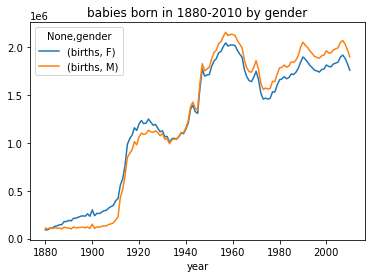

In [119]:
#연도 및 성별로 그룹화 -> 태어난 아이 수 -> 시각화
#남 여 따로 선그래프로 시각화
#x축 year, y축 태어난 아이 수 합계
names.pivot_table(index='year',columns='gender',aggfunc=sum).plot()
plt.title('babies born in 1880-2010 by gender')

In [120]:
#prop열 추가
#각 이름의 수/해당 연도에 태어난 아이 수

def prop_calc(df_by_year):
    births=df_by_year['births']
    df_by_year['prop']=births/births.sum()
    return df_by_year

In [121]:
names=names.groupby('year').apply(prop_calc)
names.groupby('year')['prop'].sum() #확인
names

,name,gender,births,year,prop
0,Mary,F,7065,1880,0.035064
1,Anna,F,2604,1880,0.012924
2,Emma,F,2003,1880,0.009941
3,Elizabeth,F,1939,1880,0.009623
4,Minnie,F,1746,1880,0.008666
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000001
1690780,Zyonne,M,5,2010,0.000001
1690781,Zyquarius,M,5,2010,0.000001
1690782,Zyran,M,5,2010,0.000001


In [139]:
#각 연도별 가장 많은 이름 top1000
def top1000(df):
    top_df=df.nlargest(1000,'births')
    return top_df
    
top1000_names=names.groupby('year').apply(top1000)
top1000_names

name gender  births  year      prop
year                                                
1880 942         John      M    9655  1880  0.047919
     943      William      M    9533  1880  0.047313
     0           Mary      F    7065  1880  0.035064
     944        James      M    5927  1880  0.029416
     945      Charles      M    5348  1880  0.026543
...               ...    ...     ...   ...       ...
2010 1657473    Cindy      F     549  2010  0.000150
     1657474  Marisol      F     549  2010  0.000150
     1657475   Eloise      F     547  2010  0.000150
     1677112   Alijah      M     547  2010  0.000150
     1657476  Lorelei      F     546  2010  0.000149

[131000 rows x 5 columns]

In [140]:
#연도 + 성별 별 이름 top 500

def top500(df):
    top_df=df.nlargest(500,'births')
    return top_df
    
top500_names=names.groupby(['year','gender']).apply(top500)
top500_names

name gender  births  year      prop
year gender                                                  
1880 F      0             Mary      F    7065  1880  0.035064
            1             Anna      F    2604  1880  0.012924
            2             Emma      F    2003  1880  0.009941
            3        Elizabeth      F    1939  1880  0.009623
            4           Minnie      F    1746  1880  0.008666
...                        ...    ...     ...   ...       ...
2010 M      1677139  Frederick      M     519  2010  0.000142
            1677140   Chandler      M     518  2010  0.000142
            1677141    Jamison      M     515  2010  0.000141
            1677142    Deandre      M     513  2010  0.000140
            1677143     Dorian      M     512  2010  0.000140

[131000 rows x 5 columns]

In [144]:
#john, mary, harry 에 대해
#x축 year, y축 태어난 아이의 수
#선 그래프
#언제 유행했는지

name_col=names.pivot_table(index='year',columns='name',values='births',aggfunc=sum)
popular_name=name_col[['John','Mary','Harry']]

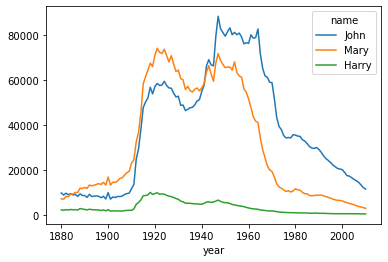

In [146]:
popular_name.plot()

In [76]:
#이름의 다양성 변화 분석
#파이차트? 비율 분석

#1880년 여자아이들 이름 종류 :942
#2010년 여자아이들 이름 종류 :19689
#x축 year y축 이름의 종류 수, 선그래프 성별로

In [151]:
name_variety=names.groupby(['year','gender'])['births'].count().unstack()
name_variety

gender,F,M
year,,
1880,942,1058
1881,938,997
1882,1028,1099
1883,1054,1030
1884,1172,1125
...,...,...
2006,20028,14011
2007,20520,14363
2008,20416,14590


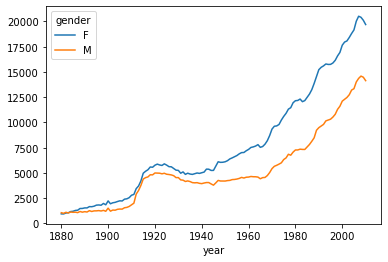

In [152]:
name_variety.plot()

<Figure size 1800x216 with 0 Axes>

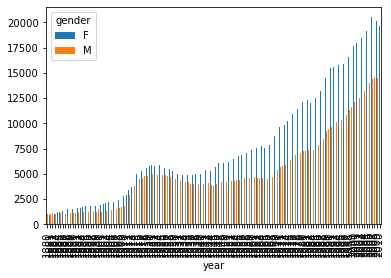

In [169]:
plt.figure(figsize=(25,3))
name_variety.plot.bar()

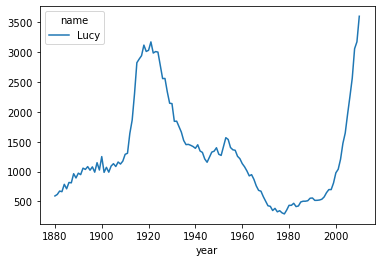

In [161]:
name_col[['Lucy']].plot()

In [207]:
#이름의 첫번째 글자

names['first_letters']=names['name'].apply(lambda x: x[0])
#성별 선호도
first_name_by_gender=names.pivot_table(index='first_letters',
                                       columns='gender',values='births',aggfunc=sum)
first_name_by_gender

gender,F,M
first_letters,,
A,14807000,10437642
B,8109527,7390473
C,12036173,11695155
D,9468764,13698477
E,8813908,6477138
F,1987948,2938923
G,3799892,6199985
H,3871071,3691530
I,1707370,1115470


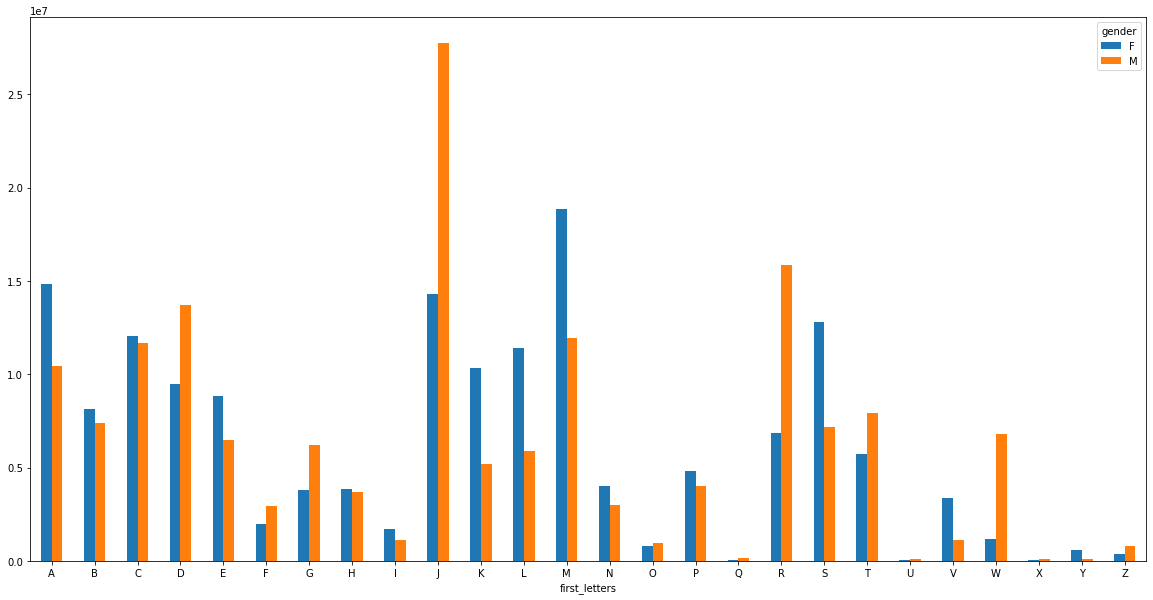

In [237]:
fig, axes=plt.subplots(figsize=(20,10))
first_name_by_gender.plot(kind='bar',rot=0, ax=axes)

In [212]:
#연도에 따라 남녀 따로 비교

first_letter_base=names.pivot_table(index='first_letters',columns=['year','gender'],values='births')
first_letter_base.head()

year                 1880                    1881                    1882  \
gender                  F           M           F           M           F   
first_letters                                                               
A              104.876404   73.326733  101.129032   72.126316  114.593750   
B              121.062500   34.672131  114.657143   34.362069  117.658537   
C               81.500000  125.936709   83.250000  117.493506   79.679012   
D               52.809524   56.545455   57.475000   51.619048   53.270833   
E              127.155556   81.105882  133.431818   78.373494  151.329670   

year                             1883                    1884              \
gender                  M           F           M           F           M   
first_letters                                                               
A               75.621359  108.710280   72.717172  115.860870   75.740000   
B               34.545455  126.682927   32.169231  130.543478   31.918919   
C              143.816901   87.910256  126.324675   94.273810  127.703704   
D               53.500000   55.285714   52.818182   53.684211   55.534884   
E               80.408602  150.510417   82.226190  158.317308   80.297872   

year           ...        2006                    2007              \
gender         ...           F           M           F           M   
first_letters  ...                                                   
A              ...  113.014011  169.399397  112.561492  162.169308   
B              ...  101.751926  183.445763   98.098837  181.833333   
C              ...   99.559813  230.851995   96.635369  231.125475   
D              ...   58.389610  127.801879   57.305395  126.988085   
E              ...  157.554545  197.587084  159.926024  191.315399   

year                 2008                    2009                    2010  \
gender                  F           M           F           M           F   
first_letters                                                               
A              107.765367  159.680636  105.937396  150.742327  102.723291   
B               97.211078  185.432566   96.895894  172.315047   93.572886   
C              100.159735  226.124688   97.791587  219.397294   99.058342   
D               56.284169  115.602151   52.965377  116.491150   50.601286   
E              148.401998  191.627778  140.649460  192.044693  136.894009   

year                       
gender                  M  
first_letters              
A              145.692308  
B              164.832827  
C              222.398943  
D              111.581900  
E              194.153409  

[5 rows x 262 columns]

In [241]:
year_comparison=first_letter_base.loc[:,([1910,2010])]
year_comparison=year_comparison.swaplevel('year','gender',1)
year_comparison

gender,F,M,F,M
year,1910,1910,2010,2010
first_letters,,,,
A,121.277580,79.911950,102.723291,145.692308
B,150.149123,38.616071,93.572886,164.832827
C,82.004484,105.548611,99.058342,222.398943
D,121.075000,63.265060,50.601286,111.581900
E,202.585903,97.838235,136.894009,194.153409
F,166.204545,148.688525,76.142077,89.950000
G,153.301887,99.287356,137.562674,189.883436
H,261.959459,115.414414,109.407925,106.058309


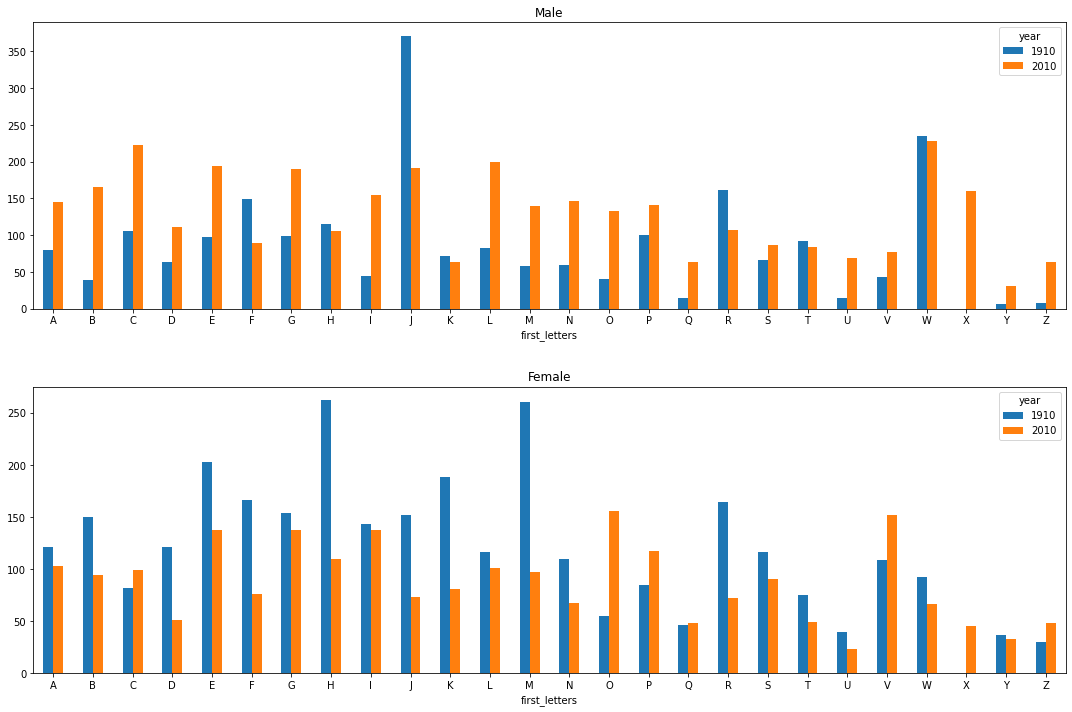

In [258]:
fig, axes=plt.subplots(2,1,figsize=(15,10))
year_comparison['M'].plot.bar(ax=axes[0], rot=0, title='Male')
year_comparison['F'].plot.bar(ax=axes[1], rot=0, title='Female')
plt.tight_layout(h_pad=3)

In [ ]:
sns.barplot(x='first_letters',y='gender',data=first_name_by_gender)